<a href="https://colab.research.google.com/github/diego2017003/pds_exercicios_unidade1/blob/main/Exercicios2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução
---
Este notebook tem por objetivo responder duas questões propostas na disciplina DCA0445  - Processamento digital de imagens, ministrada pelo professor agostinho do departamento de computação e automação(DCA) da UFRN.

As duas questões ilustram uma manipulação inicial de imagens como matrizes utilizando a biblioteca OpenCV para o processamento de imagens. A primeira questão se trata da operação de negativo em uma sessão da imagem e a segunda questão se trata da manipulação das sessões da imagem.

Por questões de maior proximidade do aluno que está desenvolvendo essa tarefa com a linguagem python, as questões serão realizadas utilizando o openCV python, e algumas funções do google colab específicas para exibição de imagens em jupyters notebooks. à medida que o problema for sendo desenvolvido a solução irá sendo comentada. Agora lhes convido a se juntarem a mim no desenvolvimento dessa tarefa, vamos lá!




## Exercício 2.1
---
Para esse exercício o usuário deve fornecer duas coordenadas P1 e P2 para representarem os vértices de um retangulo. dentro da área delimitada por esses vertices será aplicada uma operação deixando esse espaço com o  negativo da imagem original.

Para essa atividade o aluno tirou uma foto das letras abcd escritas à mão para a realização da tarefa. à medida que o código for sendo desenvolvido, iremos comentar o que está acontecend ocom a imagem.  

### passo 0: Instalando a biblioteca e importando as bibliotecas usadas
os primeiros passos são inerentes ao ambiente de desenvolvimento, iremos instalar via pip a biblioteca do opencv para python e importa-la para o nosso código. junto ao openCV é importante salientar que esse código foi desenvolvido no ambiente do Google colaboratory e portanto, iremos importar também a biblioteca do google colaboratory utilizada para exibir a imagem em ambiente controlado, semelhante à função imshow().

In [1]:
!pip install opencv-python

In [2]:
#importando o openCV
import cv2 as cv
#importando o imshow do google colab
from google.colab.patches import cv2_imshow

### Passo 1: abrindo a imagem
Nesse passo iremos abrir a imagem utilizando o openCV e converte-la para tons de cinza para que possa-mos começar a amnipular os pixels. O imread do python já vai nos retornar a imagem em formato de matriz, e existe a possibilidade de já ler a imagem em tons de cinza pasando a constante IMREAD_GRAYSCALE da lib. 

In [3]:
#Abrindo a imagem em tons de cinza
img = cv.imread('/content/letras.jpg',cv.IMREAD_GRAYSCALE)
#exibindo a imagem como uma matriz
img

array([[165, 165, 165, ..., 174, 174, 175],
       [165, 165, 165, ..., 174, 174, 175],
       [166, 166, 166, ..., 174, 174, 175],
       ...,
       [175, 175, 174, ..., 163, 162, 162],
       [175, 175, 175, ..., 163, 162, 161],
       [176, 175, 175, ..., 163, 162, 161]], dtype=uint8)

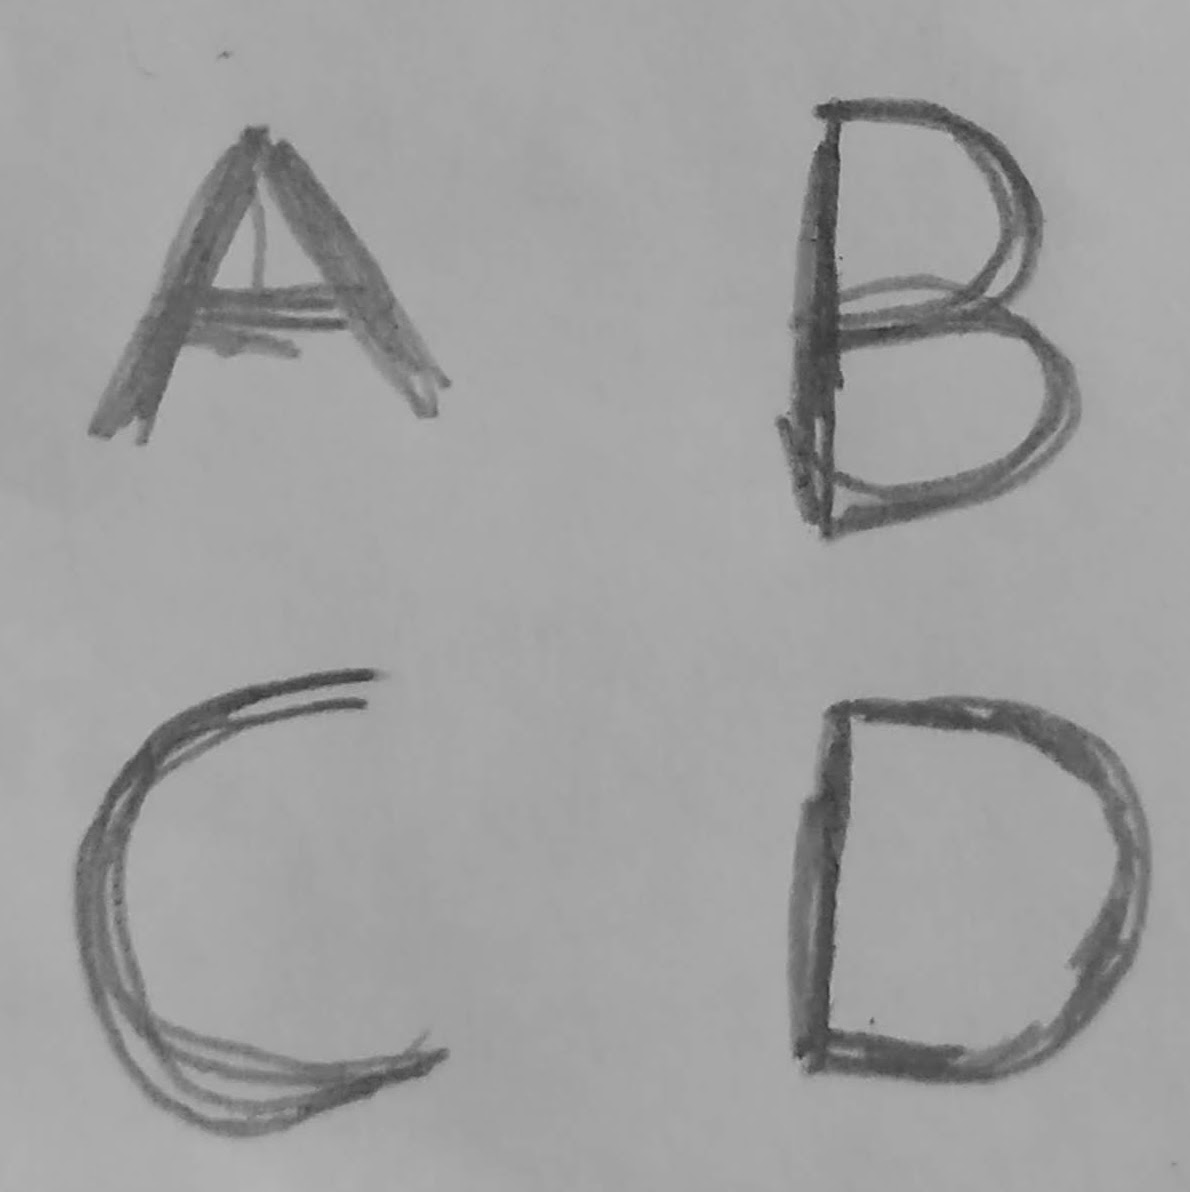

In [4]:
#exibindo a imagem
cv2_imshow(img)

### Passo2: Selecionando a sessão
Iremos utilizar 4 inputs para representar as coordenadas de P1 e P2 e em seguida selecionaremos o setor que representa a sessão. 

In [11]:
P1_x=50
P1_y=500
P2_x=600 
P2_y=1150

In [12]:
print(P1_x,P1_y)
print(P2_x,P2_y)

50 500
600 1150


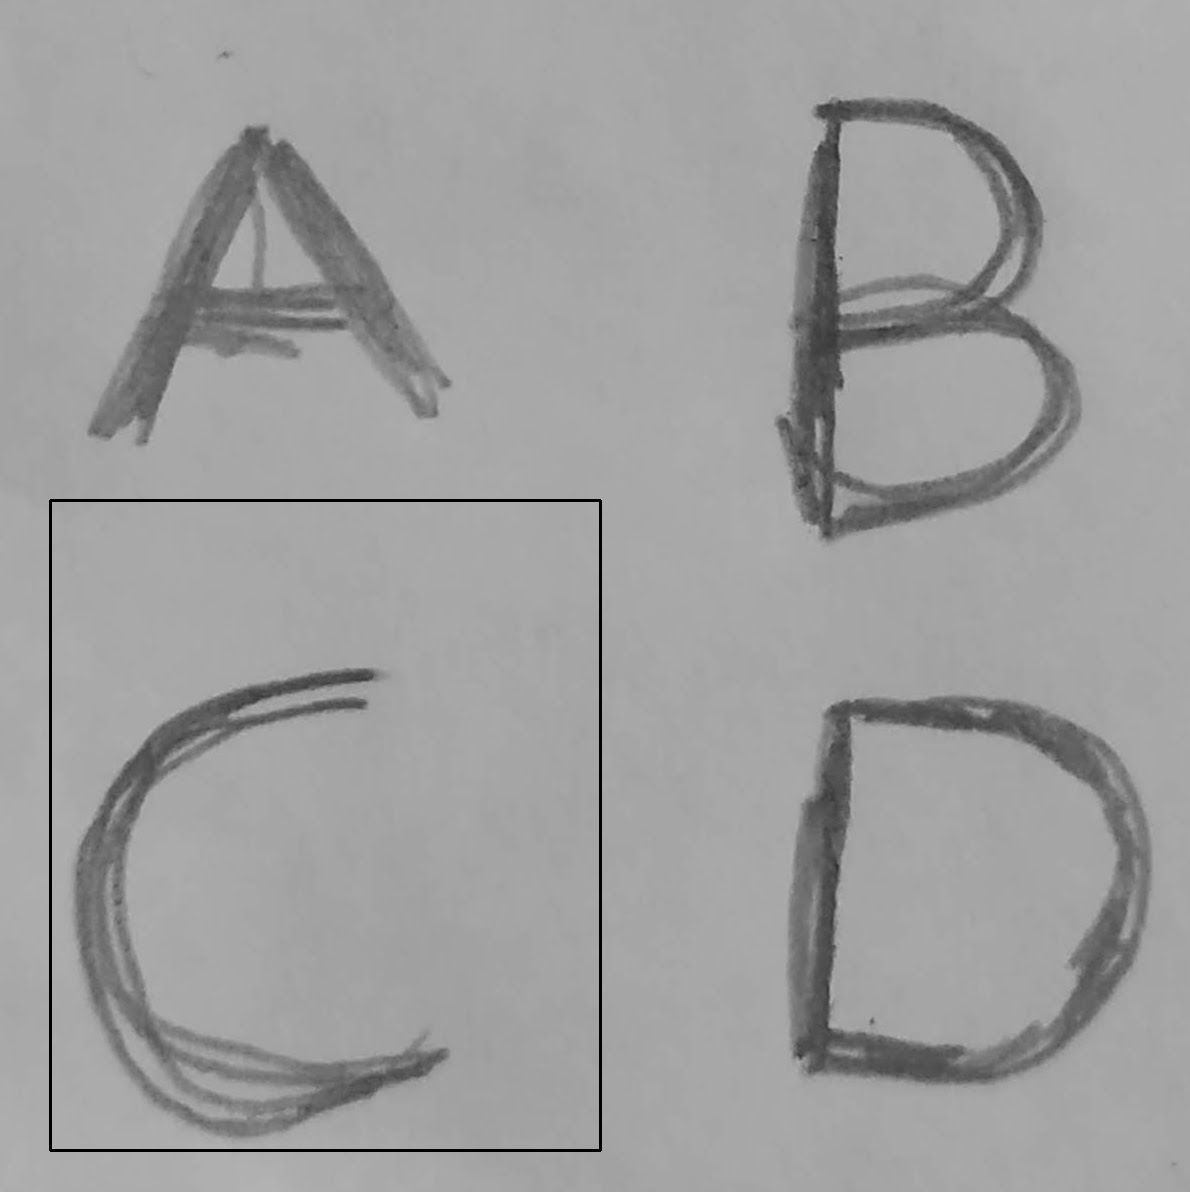

In [15]:
color = (0,0,0)
img2 = img.copy()
#para visualização, copiamos a imagem original e exibimos dentro de um retangulo a sessão escolhida
cv.rectangle(img2, (int(P1_x),int(P1_y)),(int(P2_x),int(P2_y)), color,2)
cv2_imshow(img2)

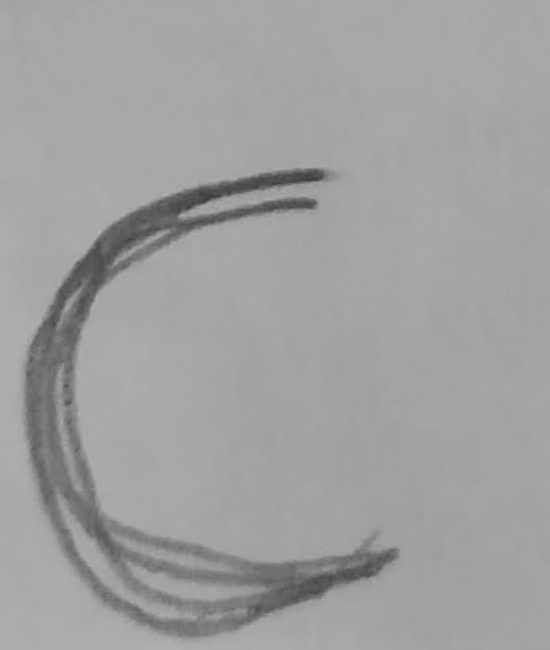

In [26]:
sessao = img[P1_y:P2_y,P1_x:P2_x]
cv2_imshow(sessao)

## Passo3: tomando o negativo
Agora que já foi mostrado como selcionar a sessão utilizando python, iremos aplicar o negativo para a sessão escolhida. Para isso iremos simplesmente igualar :
**valor do pixel na sessão selecionada** = 255-**valor do pixel na sessão selecionada**

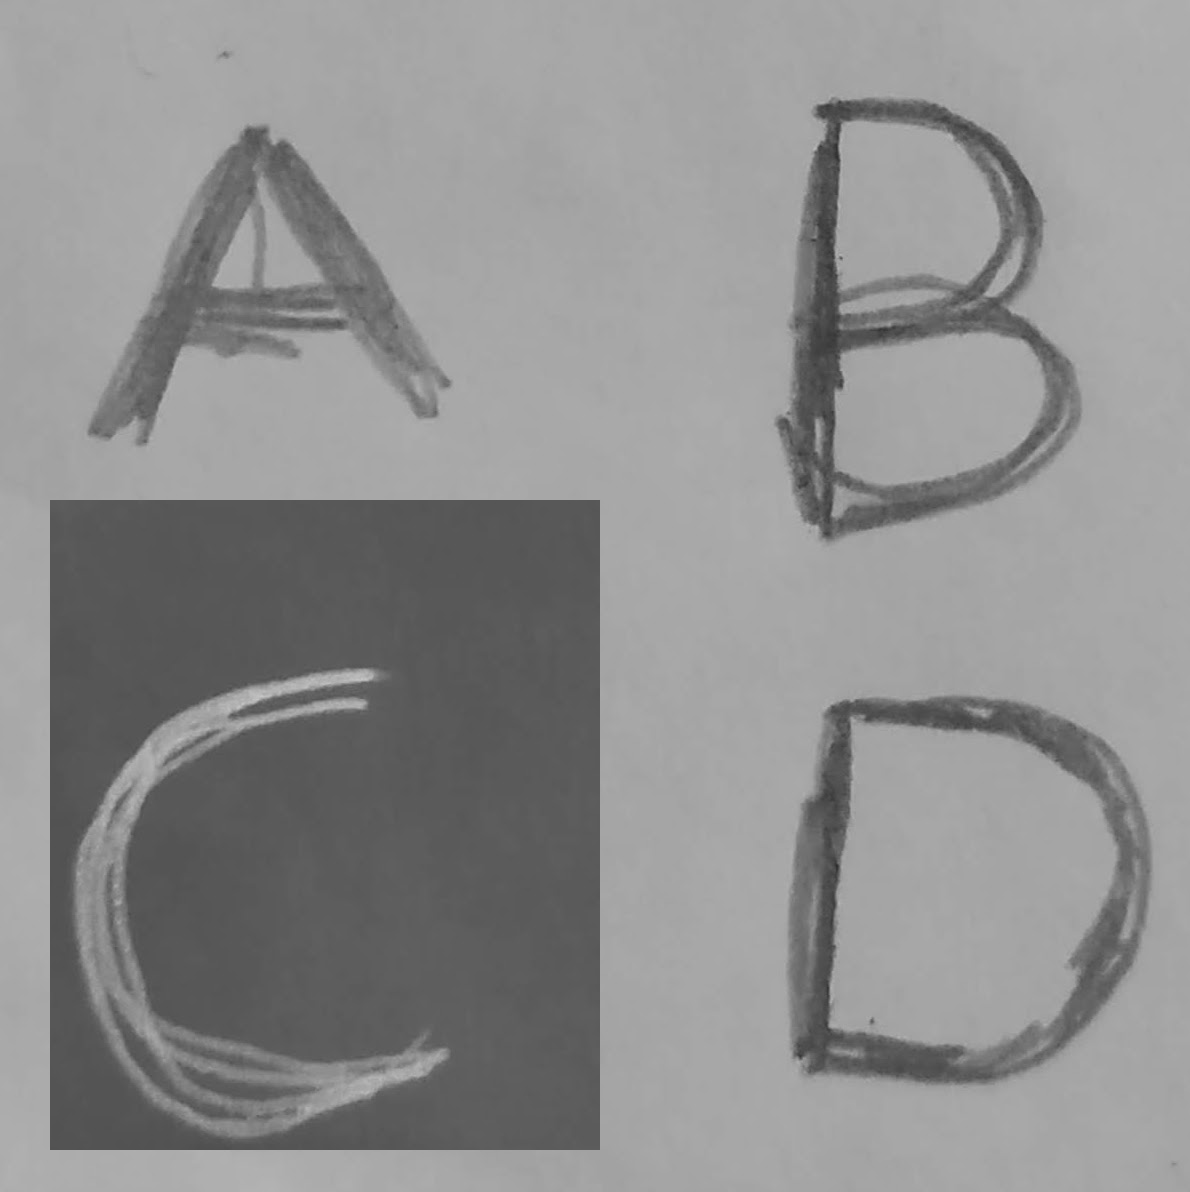

In [28]:
img2 = img.copy()
img2[P1_y:P2_y,P1_x:P2_x] = 255 - img2[P1_y:P2_y,P1_x:P2_x]
cv2_imshow(img2)

### Final: código compilado
---

insira o x para a coordenada 1:
50
insira o y para a coordenada 1:
500
insira o x para a coordenada 2:
600
insira o y para a coordenada 2:
1150


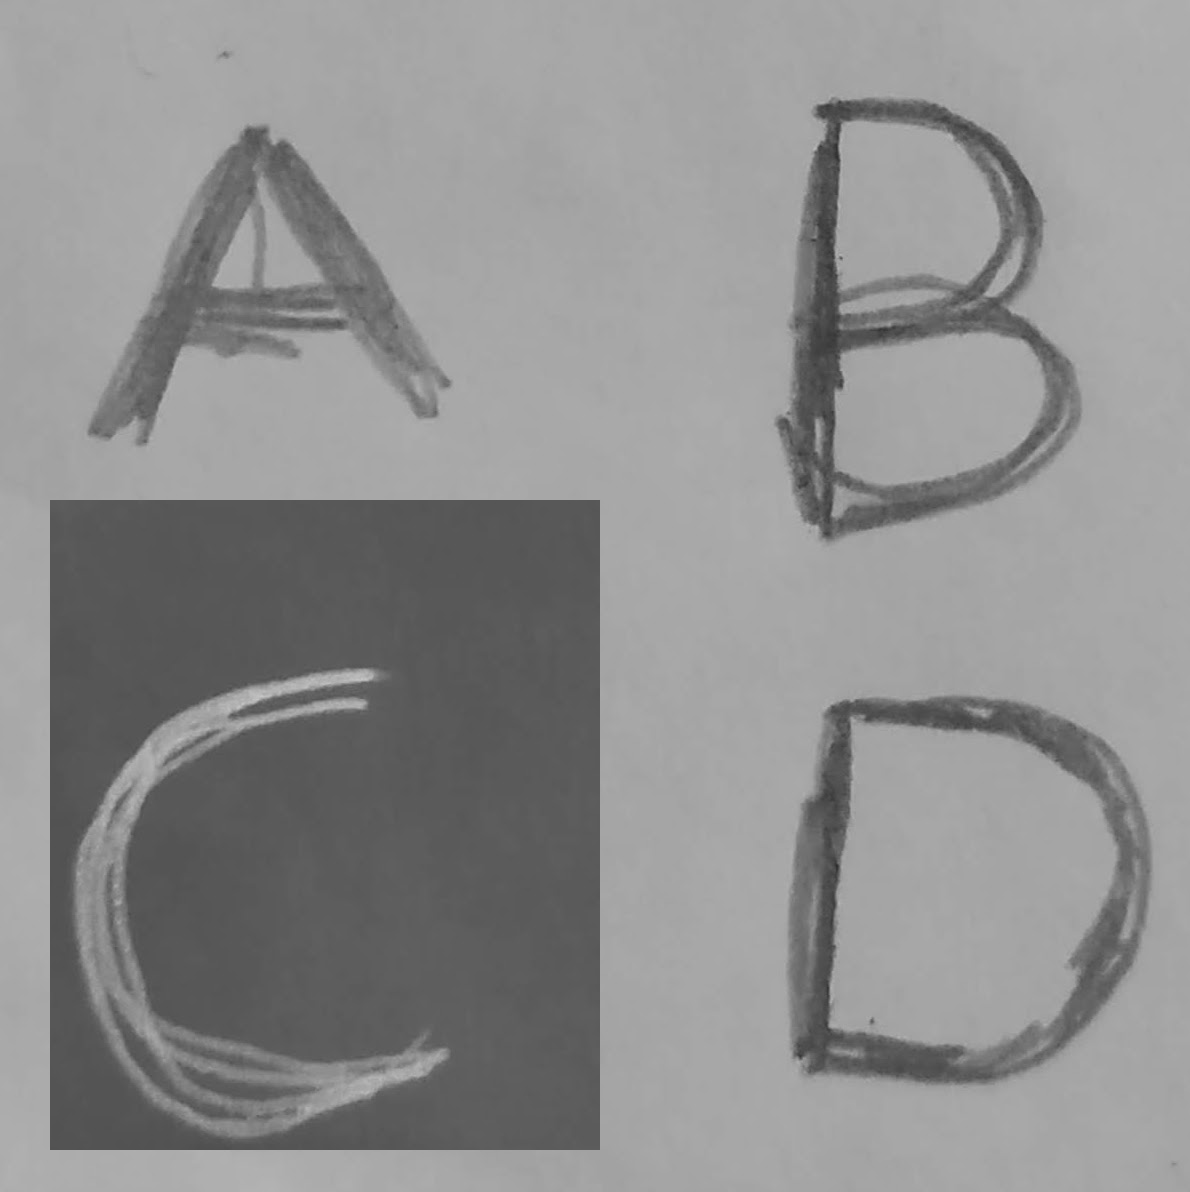

In [32]:
#importando o openCV
import cv2 as cv
#importando o imshow do google colab
from google.colab.patches import cv2_imshow

img = cv.imread('/content/letras.jpg',cv.IMREAD_GRAYSCALE)

print('insira o x para a coordenada 1:')
P1_x = int(input())
print('insira o y para a coordenada 1:')
P1_y = int(input())
print('insira o x para a coordenada 2:')
P2_x= int(input())
print('insira o y para a coordenada 2:')
P2_y= int(input())

img2 = img.copy()
img2[P1_y:P2_y,P1_x:P2_x] = 255 - img2[P1_y:P2_y,P1_x:P2_x]
cv2_imshow(img2)

## Exercício 2.2
---
Nesse exercício iremos trocar as sessões da imagem na diagonal. ou seja, dividiremos a imagem em 4 sessões e vamos trocar as sessões de de lugar utilizando as diagonais da imagem.


os passos 0 e 1 são semelhantes ao exercício anterior, logo iremos pular direto para a distribuição das sessões. Para isso vamos copiar a imagem e desenhar 4 retangulos de mesmo tamanho. Um ponto que devemos salientar é: se a imagem tiver dimensões impares, iremos ignorar o ultimo píxel na direção cujo tamanho é impar. Se tivermos uma largura impar iremos ignorar a última coluna e se tivermos uma altura impar iremos ignorar a última linha.   

### Distriuindo as sessões
---
iremos testar as dimensões e dividir as sessões.

In [46]:
#importando o openCV
import cv2 as cv
#importando o imshow do google colab
from google.colab.patches import cv2_imshow

img = cv.imread('/content/letras.jpg',cv.IMREAD_GRAYSCALE)

img2 = img.copy()
#testa se a quantidade de linhas são pares
if len(img2)%2 != 0:
  img2 = img2[0:(len(img2)),0:(len(img2)-1)]#ignora a ultima coluna

#testa se a quantidade de colunas são pares
if len(img2[0])%2 != 0:
  img2 = img2[0:(len(img2)-1),0:(len(img2))]#ignora a ultima linha

Testado se as dimensões são pares, podemos começar a dividir as sessões.

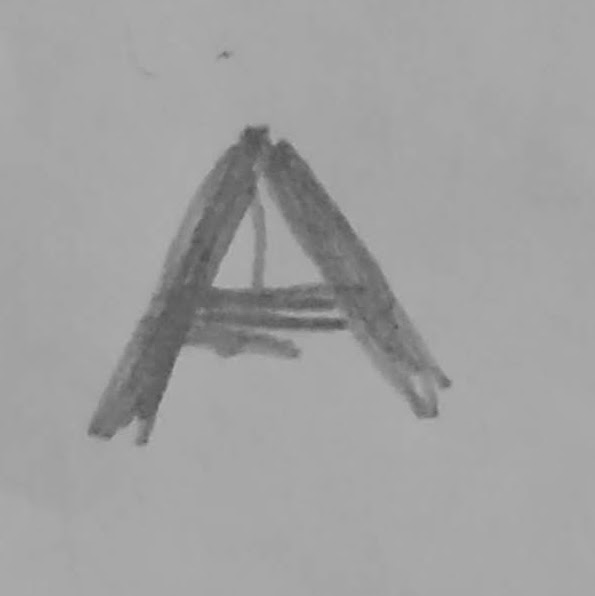

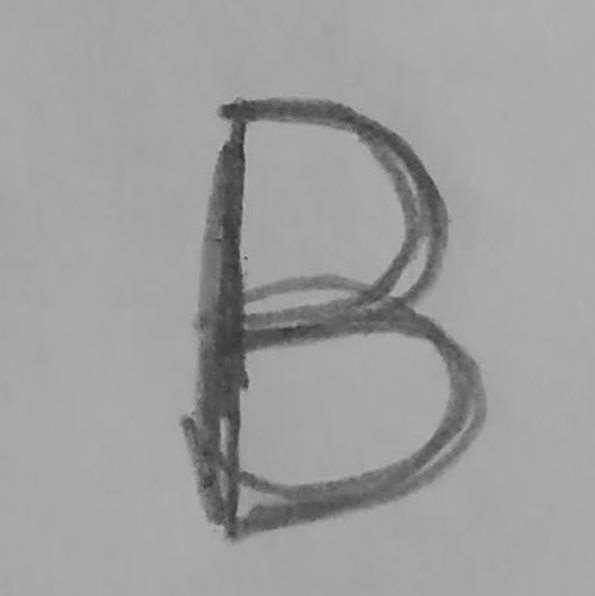

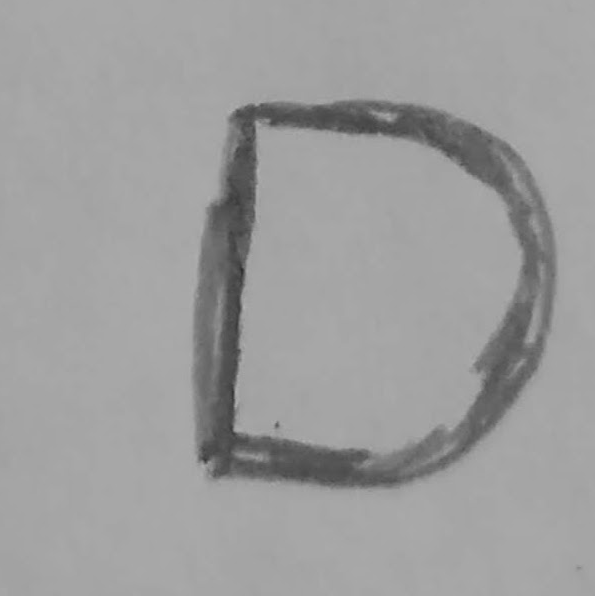

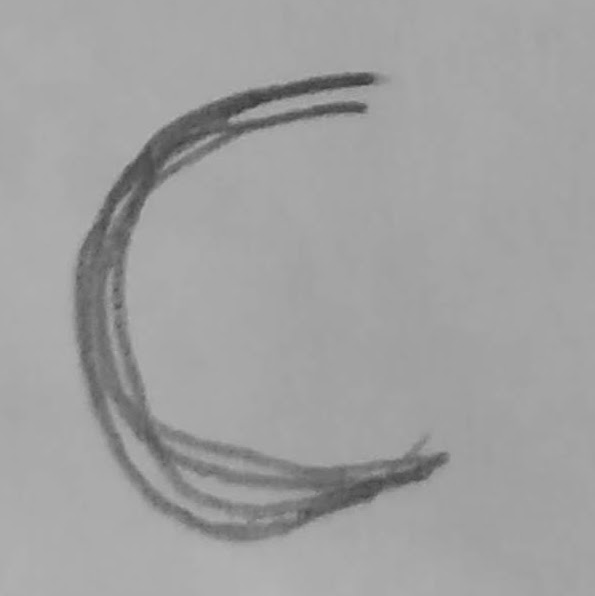

In [47]:
mid_col = int(len(img2[0])/2)
mid_row = int(len(img2)/2)
# é necessário fazer a cópia de img2 para não sobrepormos as variáveis quando formos inverter as sessões de lugar
img3 = img2.copy()
sessao_1 = img3[0:mid_row,0:mid_col]
sessao_2 = img3[0:mid_row:,mid_col:]
sessao_3 = img3[mid_row:,mid_col:]
sessao_4 = img3[mid_row:,0:mid_col]
cv2_imshow(sessao_1)
cv2_imshow(sessao_2)
cv2_imshow(sessao_3)
cv2_imshow(sessao_4)

Identificadas as sessões separadamente, iremos trocar de lugar as sessões 1 e 3, e as sessões 2 e 4 respectivamente.

In [48]:
img2[0:mid_row,0:mid_col] = sessao_3 #igualamos a sessão correspondente à sessão 1 à sessão 3 que tinhamos separado
img2[0:mid_row:,mid_col:]= sessao_4
img2[mid_row:,mid_col:] = sessao_1
img2[mid_row:,0:mid_col] = sessao_2

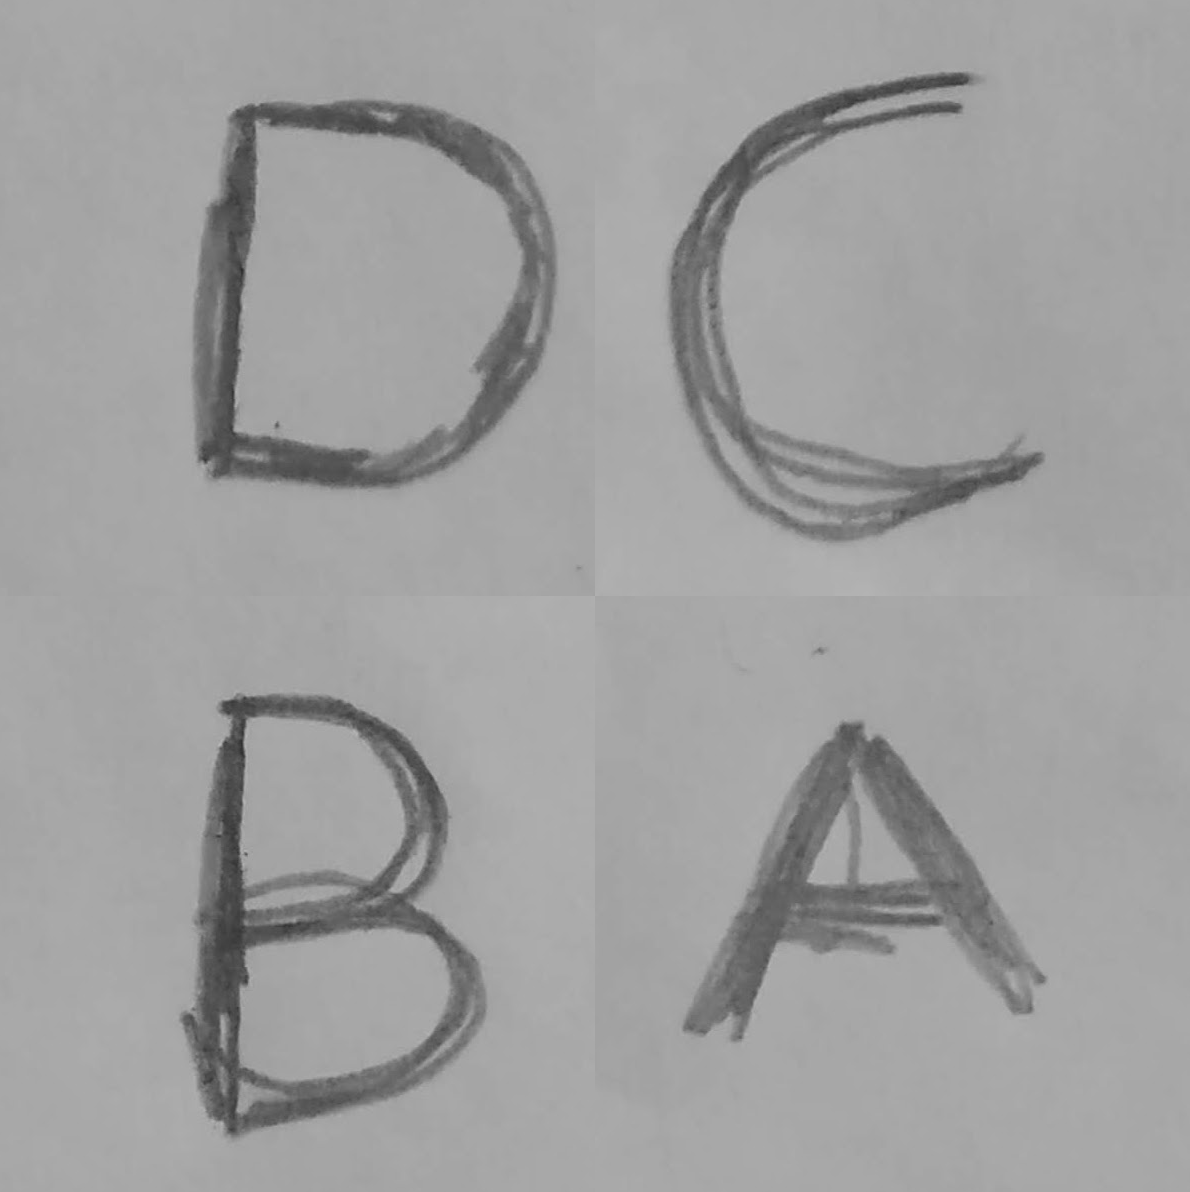

In [49]:
cv2_imshow(img2)

### Código completo:
---

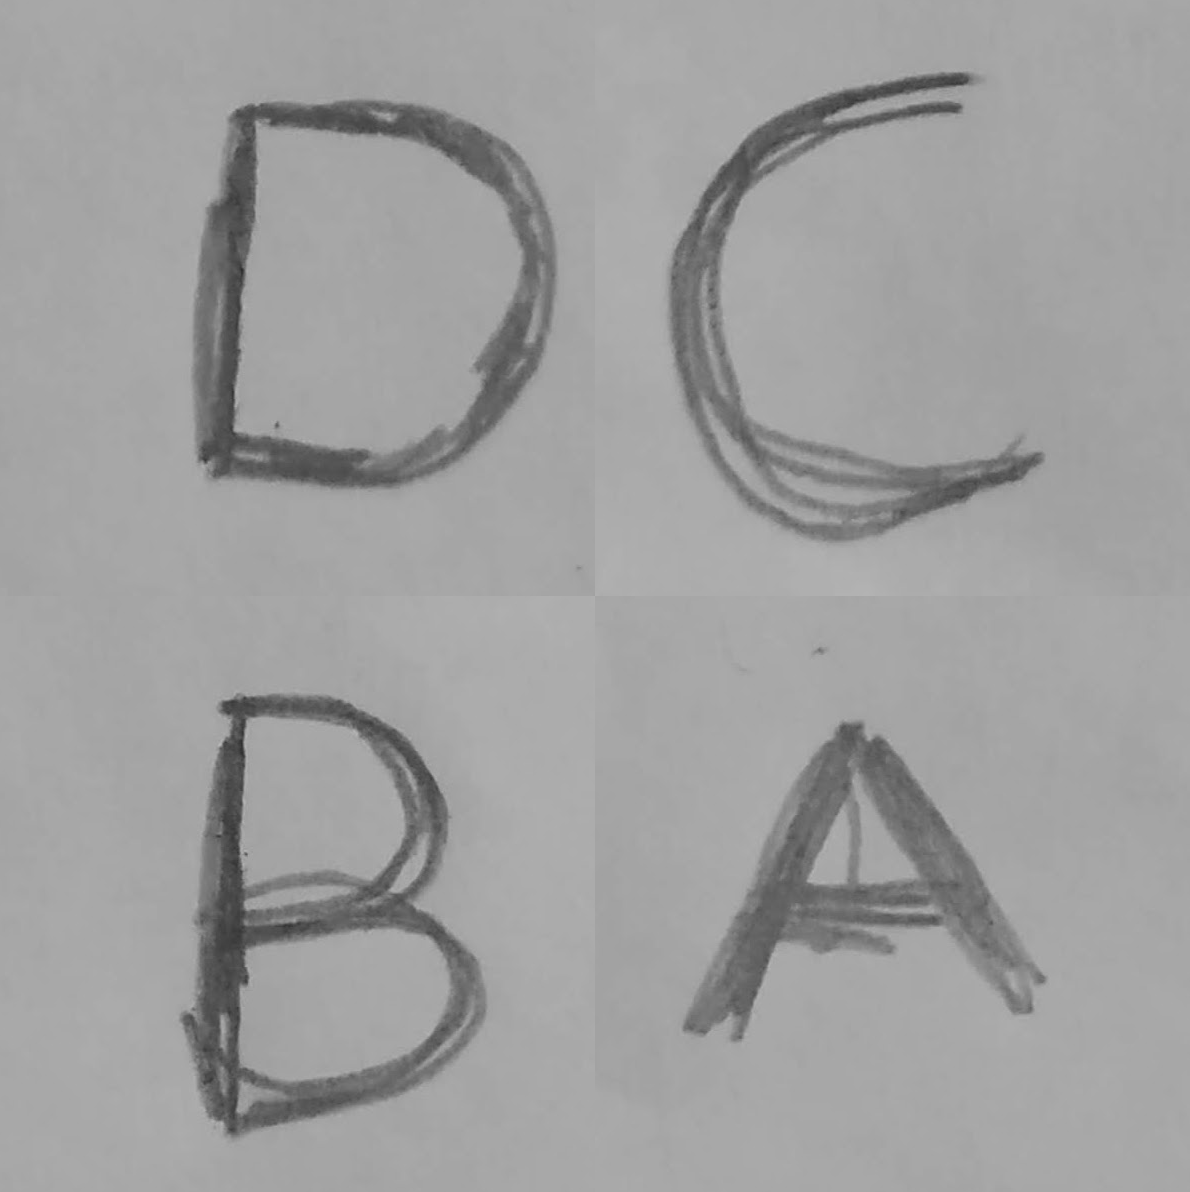

In [51]:
#importando o openCV
import cv2 as cv
#importando o imshow do google colab
from google.colab.patches import cv2_imshow

img = cv.imread('/content/letras.jpg',cv.IMREAD_GRAYSCALE)

img2 = img.copy()
#testa se a quantidade de linhas são pares
if len(img2)%2 != 0:
  img2 = img2[0:(len(img2)),0:(len(img2)-1)]#ignora a ultima coluna

#testa se a quantidade de colunas são pares
if len(img2[0])%2 != 0:
  img2 = img2[0:(len(img2)-1),0:(len(img2))]#ignora a ultima linha

mid_col = int(len(img2[0])/2)
mid_row = int(len(img2)/2)
# é necessário fazer a cópia de img2 para não sobrepormos as variáveis quando formos inverter as sessões de lugar
img3 = img2.copy()
sessao_1 = img3[0:mid_row,0:mid_col]
sessao_2 = img3[0:mid_row:,mid_col:]
sessao_3 = img3[mid_row:,mid_col:]
sessao_4 = img3[mid_row:,0:mid_col]

img2[0:mid_row,0:mid_col] = sessao_3 #igualamos a sessão correspondente à sessão 1 à sessão 3 que tinhamos copiado
img2[0:mid_row:,mid_col:]= sessao_4
img2[mid_row:,mid_col:] = sessao_1
img2[mid_row:,0:mid_col] = sessao_2
cv2_imshow(img2)